In [1]:
import plotly.figure_factory as ff


z = [[1403, 0], [0, 170]]

z_ = z

x_ = ['Gram Negative', 'Gram Positive']
y_ =  ['Gram Negative', 'Gram Positive']

# change each element of z to type string for annotations
z_text = [[str(y_) for y_ in x_] for x_ in z]



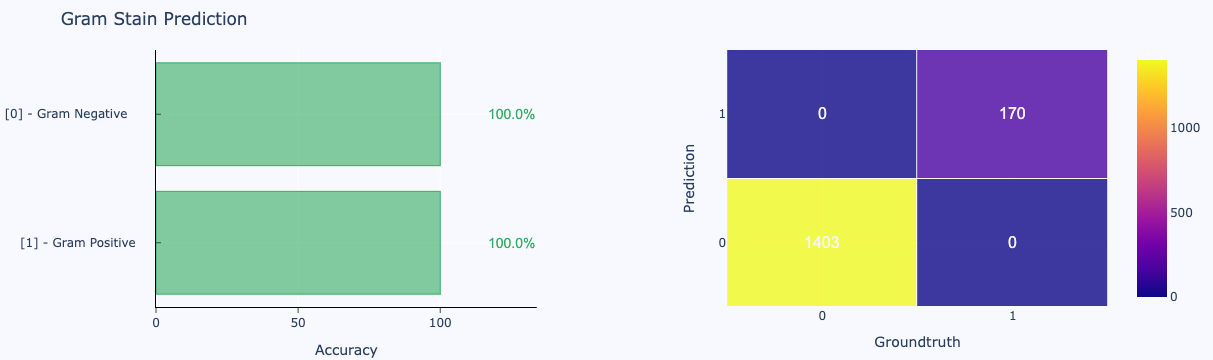

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import numpy as np

y_saving = [1, 1.0]


for x,val in enumerate(y_saving):
    y_saving[x] = val*100
    


y_net_worth = y_saving


# x = ['Acinetobacter','B subtilis','E. coli K12','S. aureus','E. coli (CCUG17620)','E. coli (NCTC13441)','E. coli (A2-39)','K. pneumoniae (A2-23)','S. aureus (CCUG35600)','E. coli (101)','E. coli (102)','E. coli (104)','K. pneumoniae (210)','K. pneumoniae (211)','K. pneumoniae (212)','K. pneumoniae (240)','Acinetobacter K12-21','Acinetobacter K48-42','Acinetobacter K55-13','Acinetobacter K57-06','Acinetobacter K71-71'][::-1]

x =  ['Gram Negative      ', 'Gram Positive    '][::-1]




x_ = []

for idx, k in enumerate(x):
    x_.append(idx)
    x[idx] = f"[{1-idx}] - {k}"
    
    
    
# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=1,  horizontal_spacing = 0.2)

fig.append_trace(go.Bar(
    x=y_saving,
    y=x,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Accuracy',
    orientation='h',
), 1, 1)

# fig.append_trace(go.Scatter(
#     x=y_net_worth, y=x,
#     mode='lines+markers',
#     line_color='rgb(128, 0, 128)',
#     name='Household net worth, Million USD/capita',
# ), 1, 2)


# set up figure 

fig.add_trace(go.Heatmap(x = x_, y= x_, z = z_,opacity=0.8, xgap = 1,ygap=1, coloraxis = "coloraxis", ),1,2)



# fig.append_trace(fig_,1,2)


fig.update_layout(
    title='Gram Stain Prediction',
    yaxis=dict(
        showgrid=True,
        showline=True,
        showticklabels=True,
        zeroline = True,
        linewidth=1, 
        linecolor='black',
        ticks="inside",
    ),
#     yaxis2=dict(
#         showgrid=False,
#         showline=True,
#         showticklabels=False,
#         linecolor='rgba(102, 102, 102, 0.8)',
#         linewidth=2,
#         domain=[0, 0.85],
#     ),
    
    yaxis2=dict(dtick=1,
                title={'text': "Prediction"}
               ),
    xaxis=dict(  title={'text': "Accuracy"},
        zeroline=False,
        showline=True,
        linecolor='black',ticks="outside",
        showticklabels=True,
               linewidth=1, 
        showgrid=True,
    ),
    xaxis2=dict(dtick=1, 
            title={'text': "Groundtruth"}
           ),
#     xaxis2=dict(
#         zeroline=False,
#         showline=False,
#         showticklabels=True,
#         showgrid=True,
#         domain=[0.47, 1],
#         side='top',
#         dtick=25000,
#     ),
    legend=dict(x=0.029, y=1.038, font_size=10), 
    margin=dict(l=5, r=5, t=50, b=50),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)


annotations = []
for n, row in enumerate(z_):
    for m, val in enumerate(row):
        annotations.append(dict(text=str(z_[n][m]), x=x_[m], y=x_[n],
                                         xref='x2', yref='y2', showarrow=False, font=dict(family='Arial', size=16,
                                      color='rgb(245,245,245)')))


fig.update_layout(
    width = 800,
    height = 300,
    autosize=False
)



y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)

# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x):
    # labeling the scatter savings
#     annotations.append(dict(xref='x2', yref='y2',
#                             y=xd, x=ydn - 20000,
#                             text='{:,}'.format(ydn) + 'M',
#                             font=dict(family='Arial', size=12,
#                                       color='rgb(128, 0, 128)'),
#                             showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 25,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()
fig.write_image("Gram.pdf")

# 

In [2]:
x_

['Acinetobacter', 'B. subtilis', 'E. coli', 'K. pneumoniae', 'S. aureus']